# Introduction
This work is inspired by [this Brigham Young University tutorial [1]](https://apmonitor.com/pdc/index.php/Main/SimulateHIV).

The spread of HIV in a patient is approximated with transient balance equations on the number of healthy cells ($H$), the number of infected cells ($I$), and the virus count ($V$). In symbols,
$$
\begin{align}
\frac{dH}{dt} & = & k_{1} - k_{2}H - k_{3}HV \\
\frac{dI}{dt} & = & k_{3}HV - k_{4}I \\
\frac{dV}{dt} & = & -k_{3}HV -k_{5}V + k_{6}I \\
\end{align}
$$
where
- $t$ is the time variable measured in years;
- $k_{1} = 1\times10^5$ is a rate denoting the number of healthy cells per year;
- $k_{2} = 0.1$ is the death rate of healthy cells;
- $k_{3} = 2\times10^{-7}$ is the number of healthy cells converting to infected cells;
- $k_{4} = 0.5$ is the death rate of infected cells;
- $k_{5} = 5$ is the death rate of the virus; and
- $k_{6} = 100$ is the virus production rate of the infected cells.

Some shorthand notations:
- $\mathbf{x} = \left[H, I, V\right]^T$
- $\mathbf{y} = \left[\dot{H}, \dot{I}, \dot{V}\right]^T$
- $\mathbf{k} = \left[k_1, k_2, k_3, k_4, k_5, k_6\right]^T$

# Simulations
As in [[1]](https://apmonitor.com/pdc/index.php/Main/SimulateHIV), the following simulations assume that no treatments are taken.

In [1]:
import numpy
from matplotlib import pyplot
from scipy.integrate import odeint, solve_ivp

In [2]:
# Parameters
k = numpy.array([1e5, 0.1, 2e-7, 0.5, 5, 100])

In [3]:
# ODE system as a function
def hiv_sys(t, x):
    '''
    A function that calculates $\mathbf{y}$ at $t$.
    
    Input args:
    x     =     array, corresponding to the vector $\mathbf{x}$
    t     =     scalar, corresponding to the time variable $t$
    
    Output args:
    y     =     array, corresponding to the vector $\mathbf{y}$
    '''
    global k
    k_1, k_2, k_3, k_4, k_5, k_6 = k
    H, I, V = x
    
    H_dot = k_1 - k_2*H - k_3*H*V
    I_dot = k_3*H*V - k_4*I
    V_dot = -k_3*H*V - k_5*V + k_6*I
    
    y= numpy.array([H_dot, I_dot, V_dot])
    return y

## Experiment 01
Simulate $H$, $I$, and $V$ over the course of 15 years at time increments of 0.1 year. The initial values (<i>i.e.</i>, at year $t=0$) are
$H\left(0\right) = 1\times10^6$,
$I\left(0\right) = 0$, and
$V\left(0\right) = 100$.

In [4]:
# Initial values
x_init = numpy.array([1e6, 0., 100.])

# Time points
t_init, t_end, t_step = 0, 15, 0.1
t = numpy.arange(t_init, t_end, t_step)

x_exp01 = odeint(hiv_sys, x_init, t, tfirst=True, rtol=1e-10, atol=1e-10)

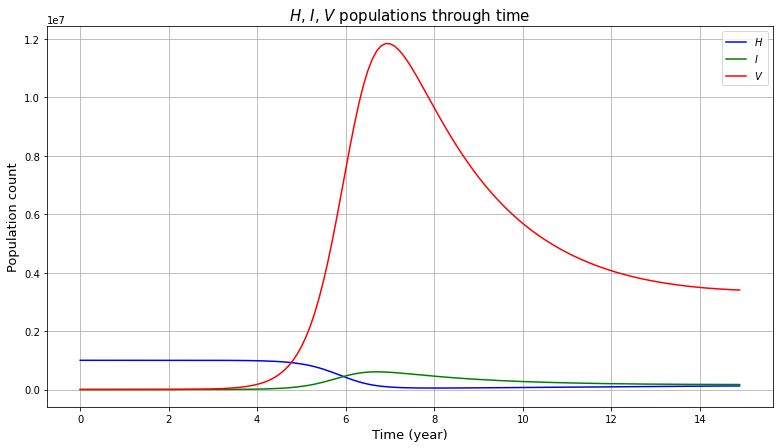

In [5]:
# Linear y-scale plot
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$H$, $I$, $V$ populations through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("linear")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp01[:,0], "b", label="$H$")
pyplot.plot(t, x_exp01[:,1], "g", label="$I$")
pyplot.plot(t, x_exp01[:,2], "r", label="$V$")

pyplot.legend(loc="best");

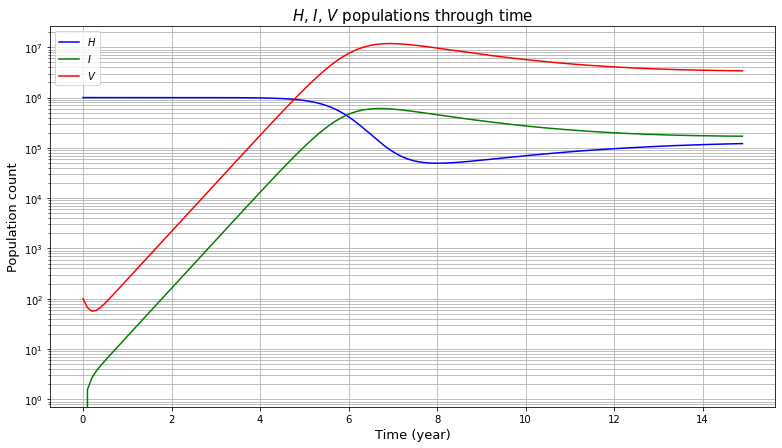

In [6]:
# Log y-scale plot
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$H$, $I$, $V$ populations through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("log")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp01[:,0], "b", label="$H$")
pyplot.plot(t, x_exp01[:,1], "g", label="$I$")
pyplot.plot(t, x_exp01[:,2], "r", label="$V$")

pyplot.legend(loc="best");

## Experiment 02
Simulate $H$, $I$, and $V$ over the course of 20 years at time increments of 0.1 year. The initial values (<i>i.e.</i>, at year $t=0$) are
$H\left(0\right) = 1\times10^6$,
$I\left(0\right) = 0$, and
$V\left(0\right) = 100$.

In [7]:
# Initial values
x_init = numpy.array([1e6, 0., 100.])

# Time points
t_init, t_end, t_step = 0, 25, 0.1
t = numpy.arange(t_init, t_end, t_step)

x_exp02 = odeint(hiv_sys, x_init, t, tfirst=True, rtol=1e-10, atol=1e-10)

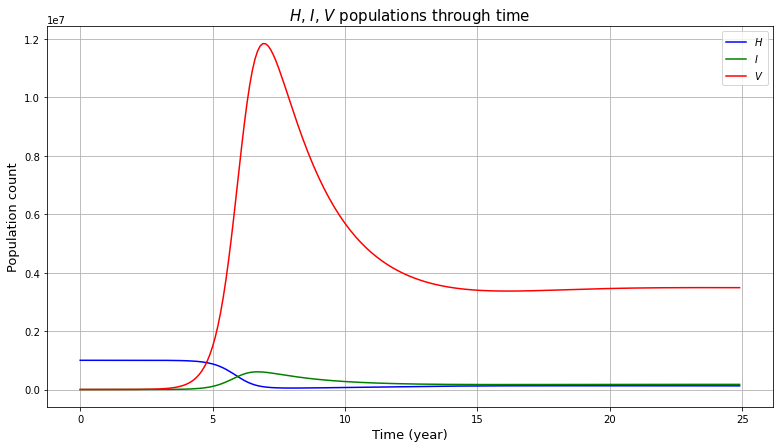

In [8]:
# Linear y-scale plot
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$H$, $I$, $V$ populations through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("linear")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp02[:,0], "b", label="$H$")
pyplot.plot(t, x_exp02[:,1], "g", label="$I$")
pyplot.plot(t, x_exp02[:,2], "r", label="$V$")

pyplot.legend(loc="best");

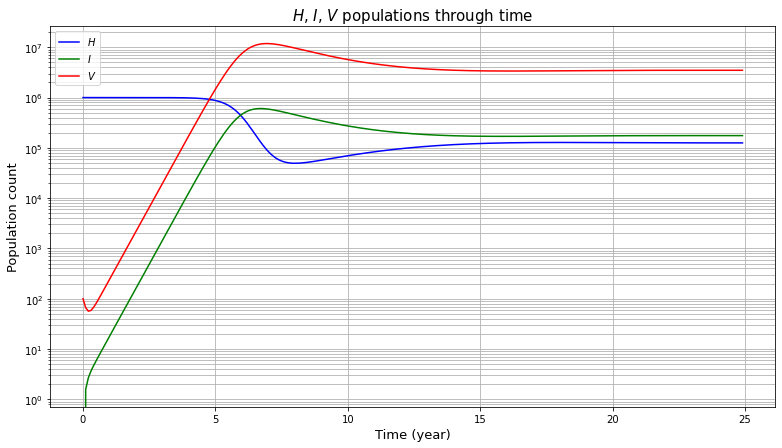

In [9]:
# Log y-scale plot
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$H$, $I$, $V$ populations through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("log")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp02[:,0], "b", label="$H$")
pyplot.plot(t, x_exp02[:,1], "g", label="$I$")
pyplot.plot(t, x_exp02[:,2], "r", label="$V$")

pyplot.legend(loc="best");

## Experiment 03
Experiment 02 but using different IVP solving algorithms.

In [10]:
# Initial values
x_init = numpy.array([1e6, 0., 100.])

# Time points
t_init, t_end, t_step = 0, 25, 0.1
t = numpy.arange(t_init, t_end, t_step)

In [11]:
x_exp03_odeint = odeint(hiv_sys, x_init, t, tfirst=True, rtol=1e-10, atol=1e-10)
x_exp03_RK23 = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="RK23", rtol=1e-8, atol=1e-10)
x_exp03_RK45 = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="RK45", rtol=1e-8, atol=1e-10)
x_exp03_DOP853 = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="DOP853", rtol=1e-8, atol=1e-10)
x_exp03_Radau = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="Radau", rtol=1e-8, atol=1e-10)
x_exp03_BDF = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="BDF", rtol=1e-8, atol=1e-10)
x_exp03_LSODA = solve_ivp(hiv_sys, (t_init, t_end), x_init, method="LSODA", rtol=1e-8, atol=1e-10)

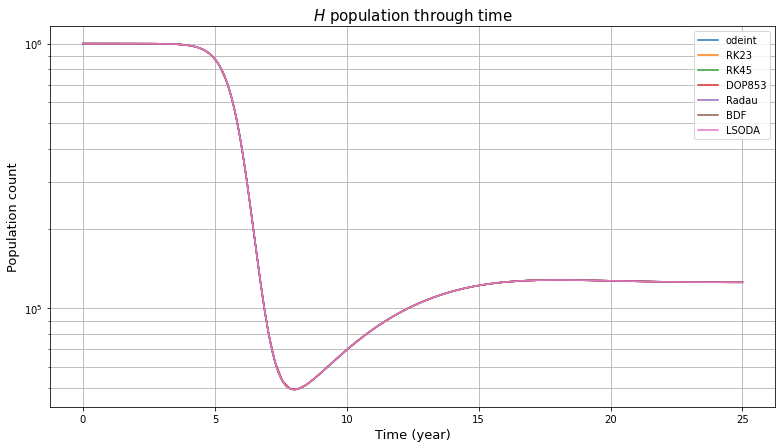

In [12]:
# Plot H
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$H$ population through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("log")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp03_odeint[:,0], "-", label="odeint")

for method, result in [("RK23", x_exp03_RK23), ("RK45", x_exp03_RK45), ("DOP853", x_exp03_DOP853), ("Radau", x_exp03_Radau), ("BDF", x_exp03_BDF), ("LSODA", x_exp03_LSODA)]:
    pyplot.plot(result.t, result.y[0,:], "-", label=method)

pyplot.legend(loc="best");

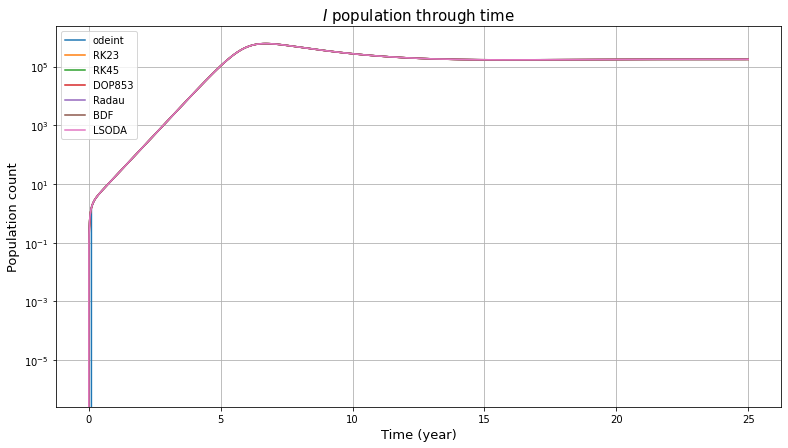

In [13]:
# Plot I
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$I$ population through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("log")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp03_odeint[:,1], "-", label="odeint")

for method, result in [("RK23", x_exp03_RK23), ("RK45", x_exp03_RK45), ("DOP853", x_exp03_DOP853), ("Radau", x_exp03_Radau), ("BDF", x_exp03_BDF), ("LSODA", x_exp03_LSODA)]:
    pyplot.plot(result.t, result.y[1,:], "-", label=method)

pyplot.legend(loc="best");

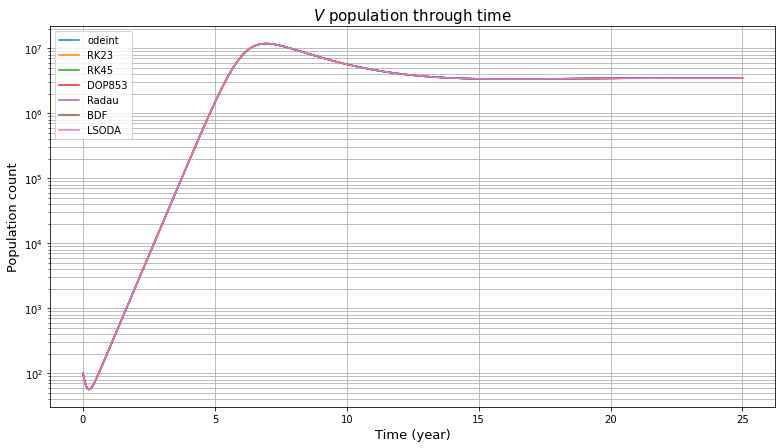

In [14]:
# Plot V
fig = pyplot.figure(figsize=(13,7))
pyplot.title("$V$ population through time", fontsize=15)
pyplot.xlabel("Time (year)", fontsize=13)
pyplot.ylabel("Population count", fontsize=13)
pyplot.yscale("log")
pyplot.grid(b=True, which="both", axis="both")

pyplot.plot(t, x_exp03_odeint[:,2], "-", label="odeint")

for method, result in [("RK23", x_exp03_RK23), ("RK45", x_exp03_RK45), ("DOP853", x_exp03_DOP853), ("Radau", x_exp03_Radau), ("BDF", x_exp03_BDF), ("LSODA", x_exp03_LSODA)]:
    pyplot.plot(result.t, result.y[2,:], "-", label=method)

pyplot.legend(loc="best");

## References
[1] [Simulate HIV Infection, a tutorial by Brigham Young University.](https://apmonitor.com/pdc/index.php/Main/SimulateHIV)

[2] [```scipy.integrate.odeint```, in SCiPy docs.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint)

[3] [```scipy.integrate.solve_ivp```, in SCiPy docs.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)